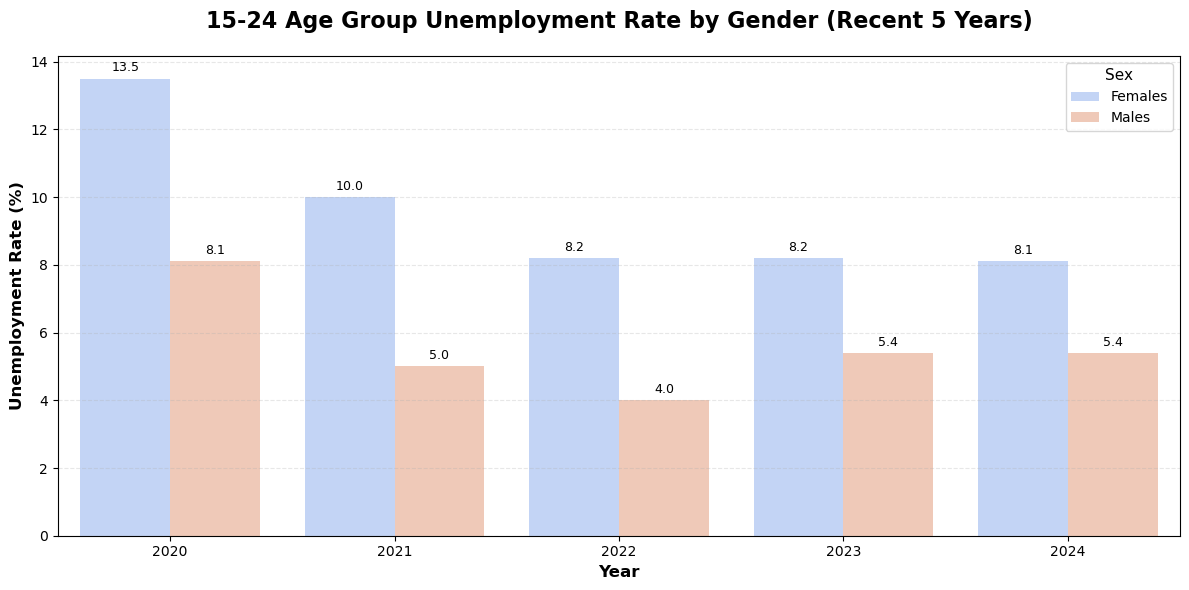

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read unemployment data categorized by gender
df = pd.read_csv("unemployment_by_sex.csv")

# Filter data for the 15-24 age group
df_15_24 = df[df["Category"] == "15-24"].copy()

# Get the most recent 5 years
latest_year = df_15_24["Year"].max()
recent_years = sorted(df_15_24["Year"].unique())[-5:]

# Filter data for the recent 5 years
df_recent = df_15_24[df_15_24["Year"].isin(recent_years)].copy()

# Ensure Unemployment is numeric
df_recent["Unemployment"] = pd.to_numeric(df_recent["Unemployment"], errors="coerce")

# Convert Year to string for easier display
df_recent["Year"] = df_recent["Year"].astype(str)

#  Visualization 
plt.figure(figsize=(12, 6))

# Create grouped bar chart using seaborn
ax = sns.barplot(
    data=df_recent, 
    x="Year", 
    y="Unemployment", 
    hue="Sex",
    palette="coolwarm",
    alpha=0.8
)

# Set title and labels
plt.title(f"15-24 Age Group Unemployment Rate by Gender (Recent 5 Years)", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Unemployment Rate (%)", fontsize=12, fontweight='bold')

# Set legend
plt.legend(title="Sex", fontsize=10, title_fontsize=11, loc='upper right')

# Display values on the bar chart
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=9)

# Grid lines
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()

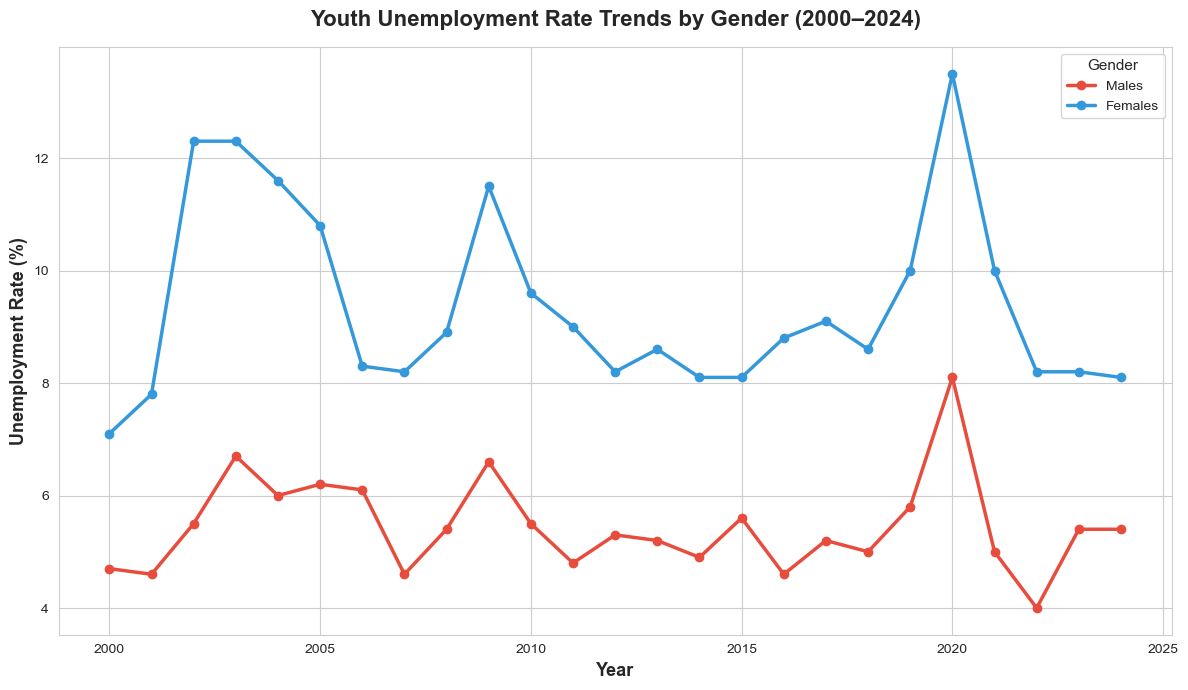

In [2]:


# Filter for youth (15–24)
df_15_24 = df[df["Category"] == "15-24"].copy()
df_15_24 = df_15_24[(df_15_24["Year"] >= 2000) & (df_15_24["Year"] <= 2024)]
df_15_24["Unemployment"] = pd.to_numeric(df_15_24["Unemployment"], errors="coerce")
df_15_24 = df_15_24.dropna(subset=["Unemployment"])

#Line Chart by Gender

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

colors = {"Males": "#e74c3c", "Females": "#3498db"}

for sex, color in colors.items():
    df_plot = df_15_24[df_15_24["Sex"] == sex].sort_values("Year")
    plt.plot(df_plot["Year"], df_plot["Unemployment"],
             label=sex, color=color, linewidth=2.5, marker='o', markersize=6)

plt.title("Youth Unemployment Rate Trends by Gender (2000–2024)", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=13, fontweight="bold")
plt.ylabel("Unemployment Rate (%)", fontsize=13, fontweight="bold")
plt.legend(title="Gender", fontsize=10, title_fontsize=11)
plt.tight_layout()

plt.show()


<Figure size 1400x800 with 0 Axes>

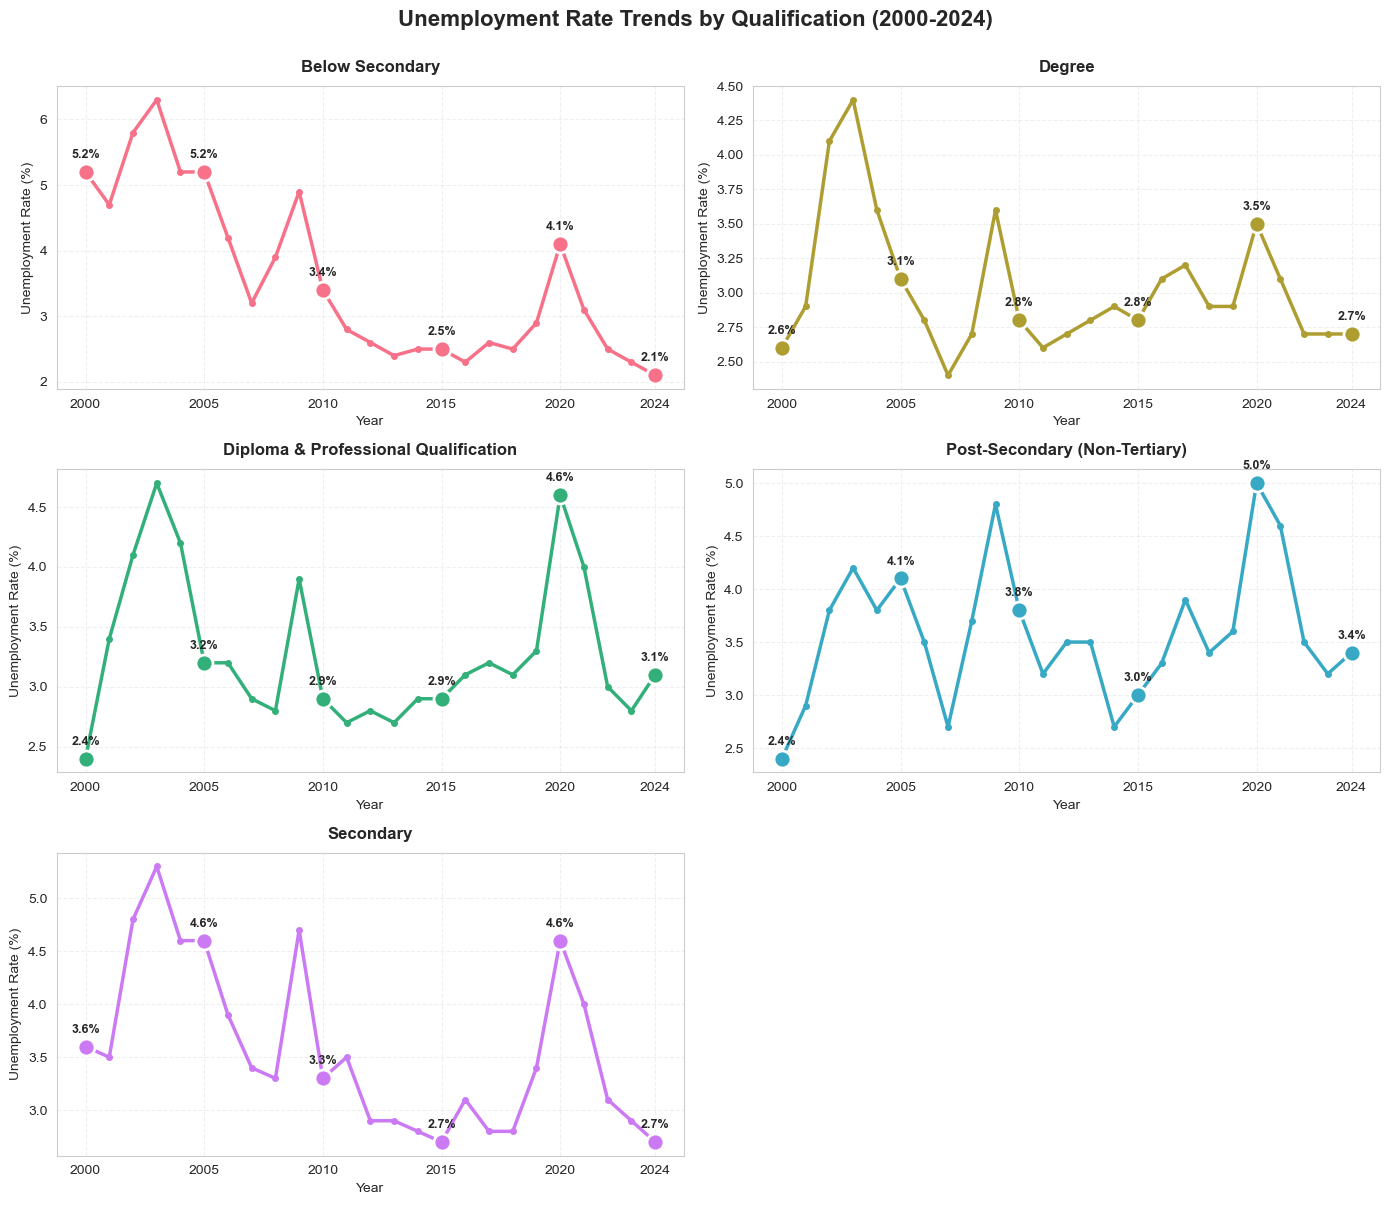

In [3]:

# Read unemployment data categorized by education level
df = pd.read_csv("unemployment_by_qualification.csv")

# Filter data for the years 2000-2024
df_filtered = df[(df["Year"] >= 2000) & (df["Year"] <= 2024)].copy()

# Ensure Unemployment is numeric
df_filtered["Unemployment"] = pd.to_numeric(df_filtered["Unemployment"], errors="coerce")

# Remove missing values
df_filtered = df_filtered.dropna(subset=["Unemployment"])
marker_years = [2000, 2005, 2010, 2015, 2020, 2024]


#Visualization 
plt.figure(figsize=(14, 8))

# Set color scheme
qualifications = df_filtered["Highest Qualification"].unique()
colors = sns.color_palette("husl", n_colors=len(qualifications))


# Generate faceted plots (one subplot per qualification) 
# Calculate subplot layout
n_quals = len(qualifications)
n_cols = 2
n_rows = int(np.ceil(n_quals / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
axes = axes.flatten() 

for idx, qual in enumerate(qualifications):
    ax = axes[idx]
    qual_data = df_filtered[df_filtered["Highest Qualification"] == qual].sort_values("Year")
    
    # Plot line
    ax.plot(qual_data["Year"], qual_data["Unemployment"], 
            color=colors[idx], linewidth=2.5, marker='o', markersize=4)
    
    # Mark points for every 5 years
    marker_data = qual_data[qual_data["Year"].isin(marker_years)]
    ax.scatter(marker_data["Year"], marker_data["Unemployment"], 
              color=colors[idx], s=150, zorder=5, edgecolors='white', linewidth=2)
    
    # Add value labels
    for _, row in marker_data.iterrows():
        ax.annotate(f'{row["Unemployment"]:.1f}%', 
                   xy=(row["Year"], row["Unemployment"]),
                   xytext=(0, 10), textcoords='offset points',
                   ha='center', fontsize=9, fontweight='bold')
    
    # Set title and labels
    ax.set_title(qual, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Unemployment Rate (%)", fontsize=10)
    ax.set_xticks(marker_years)
    ax.grid(True, alpha=0.3, linestyle='--')

# Hide excess subplots
for idx in range(n_quals, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle("Unemployment Rate Trends by Qualification (2000-2024)", 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()




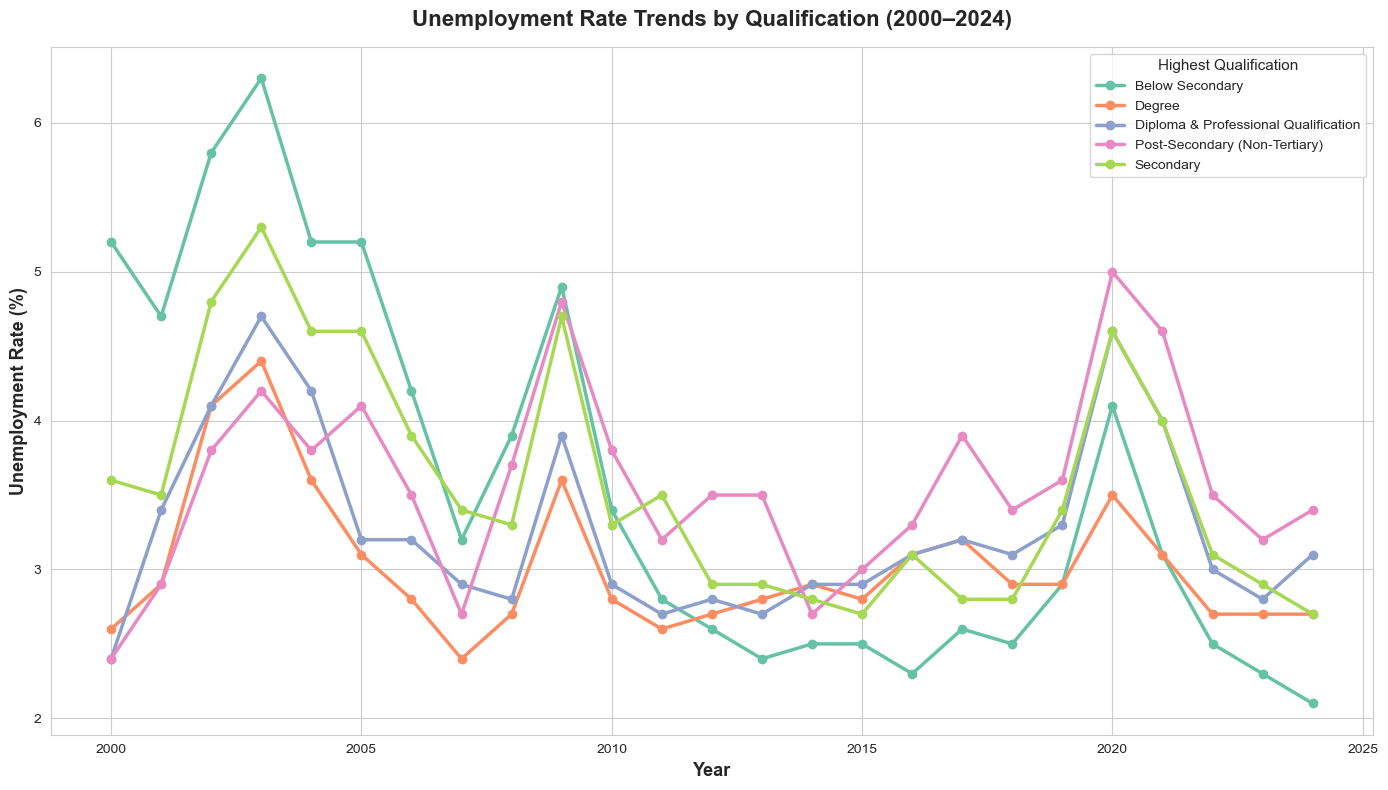

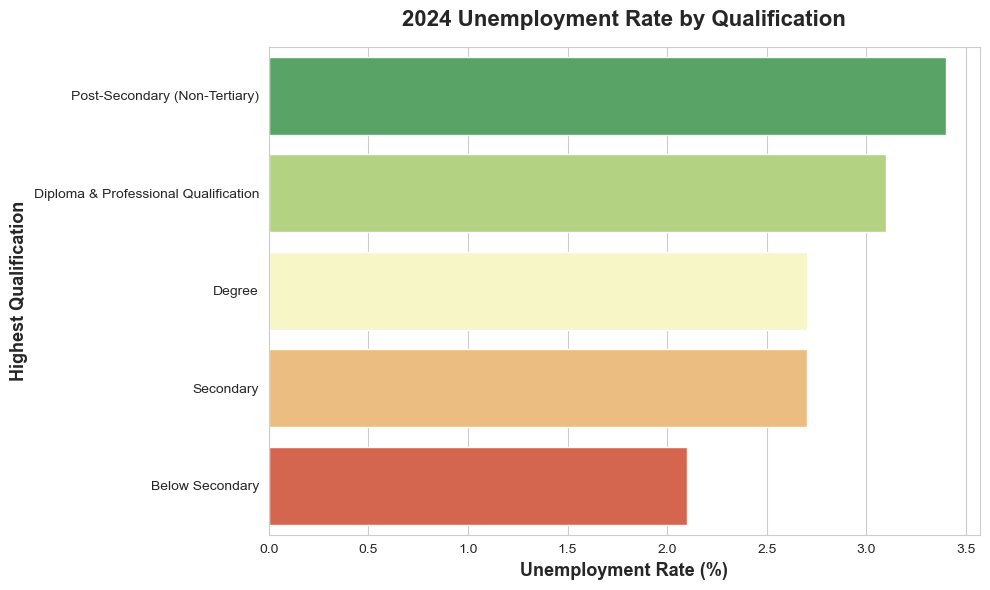

In [4]:

# Data cleaning
df["Unemployment"] = pd.to_numeric(df["Unemployment"], errors="coerce")
df = df[(df["Year"] >= 2000) & (df["Year"] <= 2024)]
df = df.dropna(subset=["Unemployment"])


#  Line Chart: Unemployment Rate Trends (2000–2024)

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Define color palette
qualifications = sorted(df["Highest Qualification"].unique())
palette = sns.color_palette("Set2", len(qualifications))

for i, qual in enumerate(qualifications):
    df_plot = df[df["Highest Qualification"] == qual].sort_values("Year")
    plt.plot(df_plot["Year"], df_plot["Unemployment"], 
             label=qual, linewidth=2.5, color=palette[i], marker='o', markersize=6)

plt.title("Unemployment Rate Trends by Qualification (2000–2024)", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=13, fontweight="bold")
plt.ylabel("Unemployment Rate (%)", fontsize=13, fontweight="bold")
plt.legend(title="Highest Qualification", fontsize=10, title_fontsize=11)
plt.tight_layout()

plt.show()

# Bar Chart: 2024 Unemployment Comparison


df_2024 = df[df["Year"] == 2024].sort_values("Unemployment", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_2024, 
            y="Highest Qualification", 
            x="Unemployment", 
            palette="RdYlGn_r", 
            hue="Highest Qualification",
            edgecolor="white")

plt.title("2024 Unemployment Rate by Qualification", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Unemployment Rate (%)", fontsize=13, fontweight="bold")
plt.ylabel("Highest Qualification", fontsize=13, fontweight="bold")
plt.tight_layout()

plt.show()

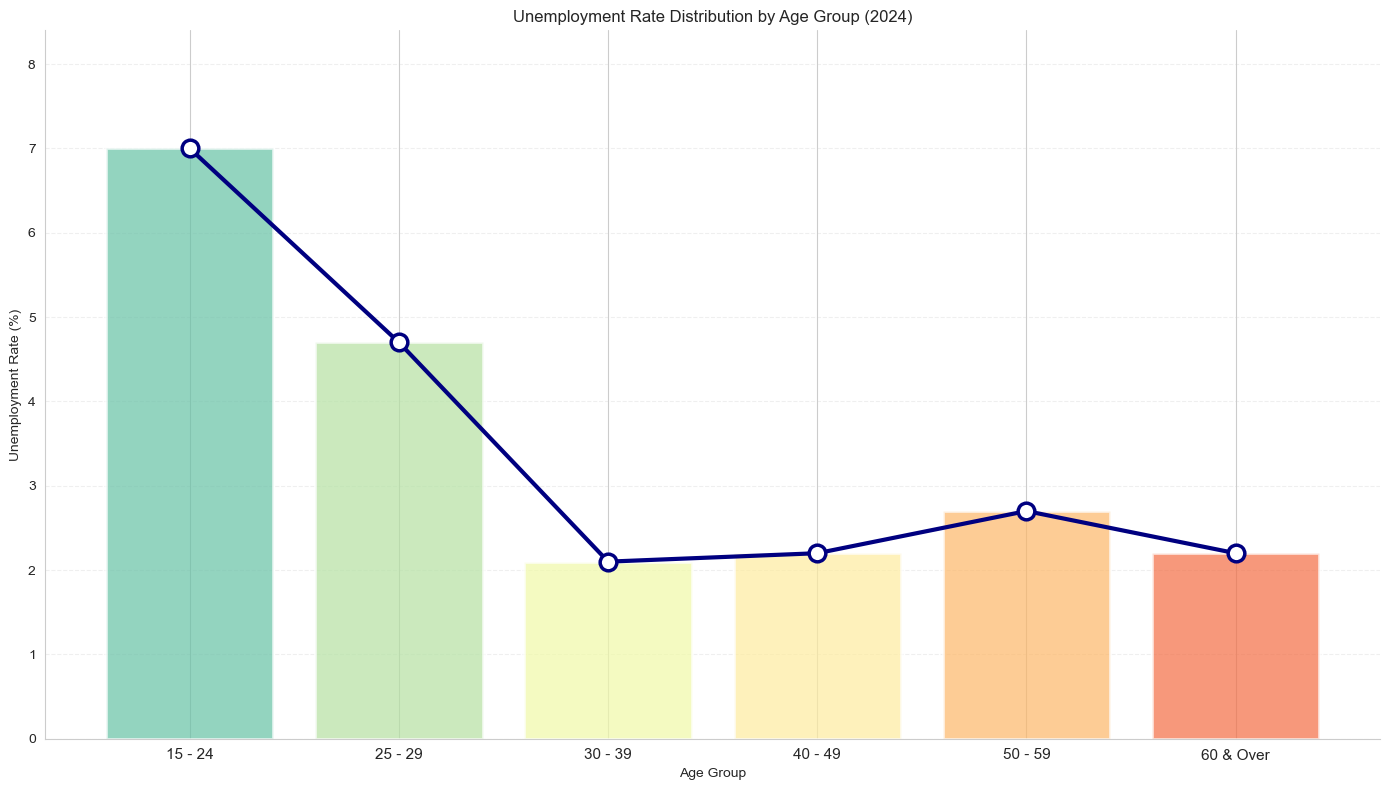

In [7]:

# Read unemployment data categorized by age group
df = pd.read_csv("unemployment_by_age.csv")

# Filter data for the year 2024
df_2024 = df[df["Year"] == 2024].copy()

# Ensure Unemployment is numeric
df_2024["Unemployment"] = pd.to_numeric(df_2024["Unemployment"], errors="coerce")

# Define target age groups (in order)
target_age_groups = [
    "15 - 24",
    "25 - 29", 
    "30 - 39",
    "40 - 49",
    "50 - 59",
    "60 & Over"
]

# Filter for specified age groups
df_filtered = df_2024[df_2024["Age Group"].isin(target_age_groups)].copy()

# Sort by the specified order
df_filtered["Age Group"] = pd.Categorical(
    df_filtered["Age Group"], 
    categories=target_age_groups, 
    ordered=True
)
df_filtered = df_filtered.sort_values("Age Group").reset_index(drop=True)

# Prepare data for plotting
x = np.arange(len(df_filtered))
y = df_filtered["Unemployment"].values
labels = df_filtered["Age Group"].values

#  Multi-color area chart 

fig, ax = plt.subplots(figsize=(14, 8))

# Use gradient colors to fill each area
colors = plt.cm.Spectral_r(np.linspace(0.2, 0.8, len(df_filtered)))

ax.bar(x, y, color=colors, alpha=0.7, edgecolor='white', linewidth=2)
ax.plot(x, y, color='navy', linewidth=3, marker='o', markersize=12,
        markerfacecolor='white', markeredgewidth=2.5, markeredgecolor='navy')

# axes, labels, title
ax.set_xticks(x); ax.set_xticklabels(labels, fontsize=11)
ax.set(xlabel="Age Group", ylabel="Unemployment Rate (%)",
       title="Unemployment Rate Distribution by Age Group (2024)")
ax.grid(True, alpha=0.3, linestyle='--', axis='y'); ax.set_axisbelow(True)
ax.spines[['top','right']].set_visible(False)
ax.set_ylim(0, max(y) * 1.2)

plt.tight_layout()
plt.show()


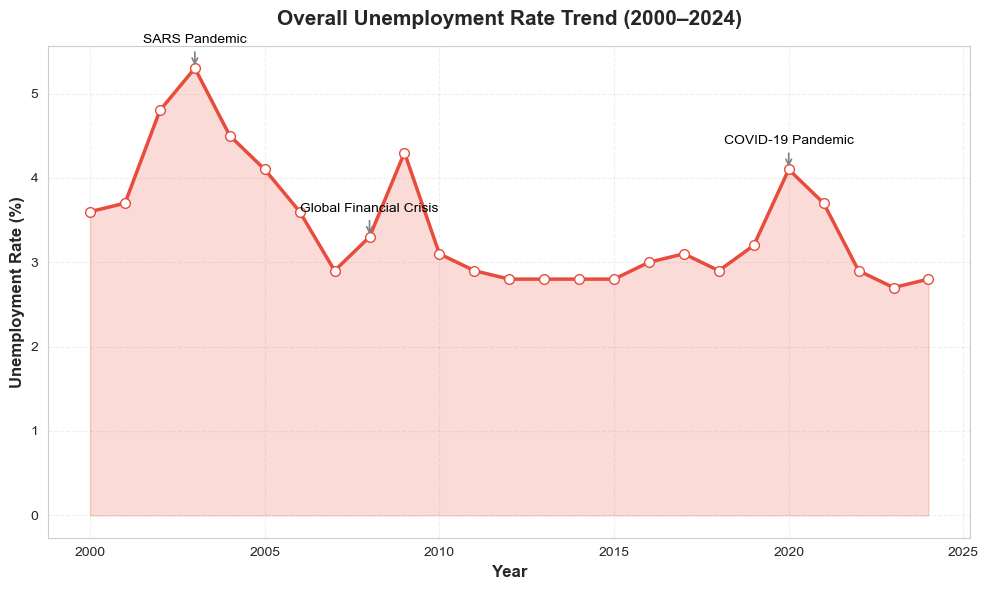

In [6]:

df_overall = df[df["Age Group"] == "Total"].copy()
# Filter year range
df_overall = df_overall[(df_overall["Year"] >= 2000) & (df_overall["Year"] <= 2024)].copy()
df_overall["Unemployment"] = pd.to_numeric(df_overall["Unemployment"], errors="coerce")
df_overall = df_overall.sort_values("Year")

#Plot overall trend

plt.figure(figsize=(10, 6))
x = df_overall["Year"]
y = df_overall["Unemployment"]

# Main line
plt.plot(x, y, color="#e74c3c", linewidth=2.5, marker="o", markersize=7,
         markerfacecolor="white", markeredgecolor="#e74c3c", label="Unemployment Rate")

# Shaded area under the line
plt.fill_between(x, y, color="#e74c3c", alpha=0.2)

# Annotate major events
events = {2003: "SARS Pandemic", 2008: "Global Financial Crisis", 2020: "COVID-19 Pandemic"}
for year, label in events.items():
    if year in x.values:
        y_val = df_overall.loc[df_overall["Year"] == year, "Unemployment"].values[0]
        plt.annotate(label,
                     xy=(year, y_val),
                     xytext=(year, y_val + 0.3),
                     arrowprops=dict(arrowstyle="->", color="gray", lw=1.2),
                     ha="center", fontsize=10, color="black")

plt.title("Overall Unemployment Rate Trend (2000–2024)", fontsize=15, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Unemployment Rate (%)", fontsize=12, fontweight="bold")
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

## Key Insights from Singapore Unemployment Analysis 

1. **Overall Trend:**  
   Economic crises such as SARS (2003), Global Financial Crisis (2008), and COVID-19 (2020) caused noticeable spikes in unemployment. Overall, the unemployment rate has gradually stabilized post-crises.

2. **Age Vulnerability:**  
   Youth (15–24) and older workers (60 & Over) experience the highest unemployment rates while middle-aged groups (25–59) generally have lower and more stable unemployment rates.

3. **Youth Gender Gap:**  
   Males and females show slightly different trends in youth unemployment, while the gender gap exists but remains moderate over the 2000–2024 period.

4. **Education Effect:**  
    Higher educational attainment correlates with lower unemployment rates. In 2024, individuals with lower qualifications face the highest unemployment, whereas graduates and post-graduates experience lower risk.

5. **Suggestions:**  
   Targeted support for youth and older workers can help reduce unemployment rate, while promoting higher education and skill development may further enhance employment resilience.
